# Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.ensemble import RandomForestClassifier

## Import Data

In [2]:
survey= pd.read_csv("Data/employee_survey_data.csv")
survey.columns= survey.columns.str.lower()
survey

,employeeid,environmentsatisfaction,jobsatisfaction,worklifebalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [3]:
display(survey.isnull().sum())

employeeid                  0
environmentsatisfaction    25
jobsatisfaction            20
worklifebalance            38
dtype: int64

In [4]:
general= pd.read_csv('Data/general_data.csv')
general
general.columns= general.columns.str.lower()
general

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,over18,percentsalaryhike,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8


In [5]:
general["employeecount"].unique()

array([1])

In [6]:
general["over18"].value_counts()

Y    4410
Name: over18, dtype: int64

In [7]:
manager= pd.read_csv('Data/manager_survey_data.csv')
manager.columns= manager.columns.str.lower()

In [8]:
general["over18"].unique()

array(['Y'], dtype=object)

## Merge data sets

In [9]:
general= pd.merge(general, survey, on = "employeeid", how = "inner")
general

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,over18,percentsalaryhike,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,4.0,1.0,3.0


In [10]:
general= pd.merge(general, manager, on = "employeeid", how = "inner")

In [11]:
general

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,over18,percentsalaryhike,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [12]:
general.dtypes

age                          int64
attrition                   object
businesstravel              object
department                  object
distancefromhome             int64
education                    int64
educationfield              object
employeecount                int64
employeeid                   int64
gender                      object
joblevel                     int64
jobrole                     object
maritalstatus               object
monthlyincome                int64
numcompaniesworked         float64
over18                      object
percentsalaryhike            int64
standardhours                int64
stockoptionlevel             int64
totalworkingyears          float64
trainingtimeslastyear        int64
yearsatcompany               int64
yearssincelastpromotion      int64
yearswithcurrmanager         int64
environmentsatisfaction    float64
jobsatisfaction            float64
worklifebalance            float64
jobinvolvement               int64
performancerating   

In [13]:
general['jobsatisfaction'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [14]:
general['totalworkingyears'].unique()

array([ 1.,  6.,  5., 13.,  9., 28., 10., 21., 16., 37.,  7.,  3., 15.,
        8., nan, 12., 17., 19., 22.,  2.,  4., 23.,  0., 11., 24., 25.,
       20., 14., 26., 18., 30., 36., 31., 33., 32., 34., 40., 29., 35.,
       27., 38.])

In [15]:
display(general.isnull().sum())

age                         0
attrition                   0
businesstravel              0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeeid                  0
gender                      0
joblevel                    0
jobrole                     0
maritalstatus               0
monthlyincome               0
numcompaniesworked         19
over18                      0
percentsalaryhike           0
standardhours               0
stockoptionlevel            0
totalworkingyears           9
trainingtimeslastyear       0
yearsatcompany              0
yearssincelastpromotion     0
yearswithcurrmanager        0
environmentsatisfaction    25
jobsatisfaction            20
worklifebalance            38
jobinvolvement              0
performancerating           0
dtype: int64

In [16]:
general.drop_duplicates()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,over18,percentsalaryhike,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,4.0,1.0,3.0,2,3


# Data Cleaning

In [17]:
#check for nan values
general.isnull().values.any()

True

In [18]:
## Replacing null value with 0: : numcompaniesworked

In [19]:
np.where(general['numcompaniesworked'].isnull())[0]

array([ 115,  210,  343,  476,  647,  799,  932, 1103, 1312, 1521, 1711,
       1996, 2365, 2696, 3063, 3533, 3910, 4226, 4395])

In [20]:
general['numcompaniesworked'] = general['numcompaniesworked'].fillna(value = 0)

In [21]:
general['numcompaniesworked'].isnull().sum()

0

In [22]:
general['numcompaniesworked'].value_counts()

1.0    1558
0.0     605
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: numcompaniesworked, dtype: int64

In [23]:
## Replacing null value with mode: environmentsatisfaction

In [24]:
np.where(general['environmentsatisfaction'].isnull())[0]

array([  11,  111,  195,  300,  405,  489,  678,  846,  909, 1077, 1224,
       1476, 1812, 2148, 2379, 2568, 2736, 2925, 3114, 3261, 3387, 3534,
       3681, 3996, 4332])

In [25]:
for column in ['environmentsatisfaction']:
    general[column].fillna(general[column].mode()[0], inplace=True)

In [26]:
general['environmentsatisfaction'].isnull().sum()

0

In [27]:
## Replacing null value with mode: jobsatisfaction

In [28]:
np.where(general['jobsatisfaction'].isnull())[0]

array([  40,  124,  313,  586,  859, 1195, 1468, 1678, 1909, 2182, 2476,
       2707, 2875, 3085, 3295, 3526, 3778, 4030, 4219, 4345])

In [29]:
for column in ['jobsatisfaction']:
    general[column].fillna(general[column].mode()[0], inplace=True)

In [30]:
general['jobsatisfaction'].isnull().sum()

0

In [31]:
## Replacing null value with mode: worklifebalance

In [32]:
np.where(general['worklifebalance'].isnull())[0]

array([  84,  273,  483,  609,  735,  861,  987, 1092, 1197, 1260, 1323,
       1407, 1470, 1533, 1596, 1659, 1722, 1785, 1848, 1911, 1953, 2016,
       2079, 2142, 2226, 2310, 2394, 2478, 2583, 2709, 2898, 3024, 3339,
       3654, 3885, 4116, 4305, 4409])

In [33]:
for column in ['worklifebalance']:
    general[column].fillna(general[column].mode()[0], inplace=True)

In [34]:
general['worklifebalance'].isnull().sum()

0

In [35]:
## Replacing null value with mode: totalworkingyears

In [36]:
for column in ['totalworkingyears']:
    general[column].fillna(general[column].mode()[0], inplace=True)

In [37]:
general.isnull().sum()

age                        0
attrition                  0
businesstravel             0
department                 0
distancefromhome           0
education                  0
educationfield             0
employeecount              0
employeeid                 0
gender                     0
joblevel                   0
jobrole                    0
maritalstatus              0
monthlyincome              0
numcompaniesworked         0
over18                     0
percentsalaryhike          0
standardhours              0
stockoptionlevel           0
totalworkingyears          0
trainingtimeslastyear      0
yearsatcompany             0
yearssincelastpromotion    0
yearswithcurrmanager       0
environmentsatisfaction    0
jobsatisfaction            0
worklifebalance            0
jobinvolvement             0
performancerating          0
dtype: int64

## Handling Null Value

In [38]:
## transforming float into int64

for column in general.columns:
    if general[column].dtype == 'float64':
        general[column] = general[column].astype('int64')

In [39]:
general.dtypes

age                         int64
attrition                  object
businesstravel             object
department                 object
distancefromhome            int64
education                   int64
educationfield             object
employeecount               int64
employeeid                  int64
gender                     object
joblevel                    int64
jobrole                    object
maritalstatus              object
monthlyincome               int64
numcompaniesworked          int64
over18                     object
percentsalaryhike           int64
standardhours               int64
stockoptionlevel            int64
totalworkingyears           int64
trainingtimeslastyear       int64
yearsatcompany              int64
yearssincelastpromotion     int64
yearswithcurrmanager        int64
environmentsatisfaction     int64
jobsatisfaction             int64
worklifebalance             int64
jobinvolvement              int64
performancerating           int64
dtype: object

## Dropping not informative columns

In [40]:
general['over18'].value_counts()

Y    4410
Name: over18, dtype: int64

In [41]:
general['employeecount'].value_counts()

1    4410
Name: employeecount, dtype: int64

In [42]:
general['standardhours'].value_counts()

8    4410
Name: standardhours, dtype: int64

In [43]:
general = general.drop(['over18','employeecount', 'standardhours' ], axis = 1).reset_index(drop = True)


In [44]:
general

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,percentsalaryhike,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1,11,0,1,6,1,0,0,3,4,2,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0,23,1,6,3,5,1,4,3,2,4,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1,15,3,5,2,5,0,3,2,2,1,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3,11,3,13,5,8,7,5,4,4,3,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4,12,2,9,2,6,0,4,4,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,Single,60290,3,17,1,10,5,3,0,2,4,1,3,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,Divorced,26790,2,15,0,10,2,3,0,2,4,4,3,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,Married,37020,0,20,0,5,4,4,1,2,1,3,3,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,Divorced,23980,0,14,1,10,2,9,7,8,4,1,3,2,3


# Data Processing

## Transforming dt Time

In [45]:
in_time= pd.read_csv('Data/in_time.csv')
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [46]:
out_time = pd.read_csv('Data/out_time.csv')
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

In [47]:
## Concat time data sets

In [48]:
total_time= in_time.append(out_time)
total_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [49]:
# remove 0 values (0 values are days where the office was closed)

In [50]:
total_time = total_time.dropna(axis=1, how='all')

In [51]:
total_time

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2015-03-30 10:11:44,2015-03-31 10:08:13,2015-04-01 10:12:37,2015-04-02 09:45:27,2015-04-03 10:00:30,2015-04-06 09:40:19,2015-04-07 10:16:43,2015-04-0

In [52]:
# replace individual days that have NaN with 0 ( for future calculations)

In [53]:
total_time = total_time.fillna(0)
total_time

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,0,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,0,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,0,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,0,2015-03-27 09:47:30,2015-03-30 10:11:44,2015-03-31 10:08:13,2015-04-01 10:12:37,2015-04-02 09:45:27,2015-04-03 10:00:30,2015-04-06 09:40:19,2015-04-07 10:16:43,2015-04-08 10:04:

In [54]:
## Convert to datatime format

In [55]:
total_time.iloc[:,1:]= total_time.iloc[:,1:].apply(pd.to_datetime, errors='coerce')

In [56]:
total_time

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,1970-01-01 00:00:00,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,1970-01-01 00:00:00,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,1970-01-01 00:00:00,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,1970-01-01 00:00:00,2015-03-27 09:47:30,2015-03-30 10:11:44,2015-03-31 10:08:13,2015-04-01 10:12:37,2015-04-02 09:45:27,2015-

In [57]:
total_time = total_time.diff(periods=4410)

In [58]:
total_time = total_time.iloc[4410:]

In [59]:
total_time

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0.0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 07:3

In [60]:
total_time = total_time.reset_index(drop=True)

In [61]:
total_time

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0.0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 07:3

In [62]:
total_time.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [63]:
total_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 07:33:45,0 days 07:

In [64]:
total_time['mean_time'] = total_time.mean(axis=1)

In [65]:
total_time

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 07:33:45,

In [66]:
# convert mean time into hours
total_time.mean_time = total_time.mean_time.apply(lambda x : int(str(x).split(' ')[2].split(':')[0]) + int(str(x).split(' ')[2].split(':')[1])/60 + float(str(x).split(' ')[2].split(':')[2])/3600)
total_time.index = range(1,len(total_time)+1)

In [67]:
total_time.reset_index(inplace=True)

In [68]:
total_time

,index,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,1,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 0

In [69]:
total_time.index = range(1,len(total_time)+1)

In [70]:
# Rename index as emID to add the general data set
total_time = total_time.rename(columns = {'index' : 'employeeid'})

In [71]:
# Overwrite totalt only with the columns we need for general
total_time = total_time[['employeeid','mean_time']]  


In [72]:
# merge mean_time and general
general = pd.merge(general, total_time, on = 'employeeid', how = 'inner')

In [73]:
general

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeeid,gender,joblevel,jobrole,maritalstatus,monthlyincome,numcompaniesworked,percentsalaryhike,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1,11,0,1,6,1,0,0,3,4,2,3,3,6.870229
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0,23,1,6,3,5,1,4,3,2,4,2,4,7.315971
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1,15,3,5,2,5,0,3,2,2,1,3,3,6.816081
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3,11,3,13,5,8,7,5,4,4,3,2,3,6.789215
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4,12,2,9,2,6,0,4,4,1,3,3,3,7.877561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,Single,60290,3,17,1,10,5,3,0,2,4,1,3,3,3,8.316921
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,Divorced,26790,2,15,0,10,2,3,0,2,4,4,3,2,3,5.897197
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,Married,37020,0,20,0,5,4,4,1,2,1,3,3,3,4,7.149526
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,Divorced,23980,0,14,1,10,2,9,7,8,4,1,3,2,3,9.187612


In [74]:
general.to_csv('Data/general_hr_data.csv')

## Data Distribution

In [75]:
general['businesstravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: businesstravel, dtype: int64

In [76]:
general['department'].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: department, dtype: int64

In [77]:
general['distancefromhome'].value_counts()

2     633
1     624
10    258
9     255
3     252
7     252
8     240
5     195
4     192
6     177
16     96
11     87
24     84
23     81
29     81
18     78
15     78
25     75
26     75
20     75
28     69
19     66
14     63
17     60
12     60
22     57
13     57
21     54
27     36
Name: distancefromhome, dtype: int64

In [78]:
general['education'].value_counts()

3    1716
4    1194
2     846
1     510
5     144
Name: education, dtype: int64

In [79]:
general['educationfield'].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: educationfield, dtype: int64

In [80]:
general['joblevel'].value_counts()

1    1629
2    1602
3     654
4     318
5     207
Name: joblevel, dtype: int64

In [81]:
general['jobrole'].value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: jobrole, dtype: int64

In [82]:
general['maritalstatus'].value_counts()

Married     2019
Single      1410
Divorced     981
Name: maritalstatus, dtype: int64

In [83]:
general['monthlyincome'].sort_values(ascending= False)

3325    199990
1855    199990
385     199990
941     199730
3881    199730
         ...  
3862     10510
2392     10510
2178     10090
708      10090
3648     10090
Name: monthlyincome, Length: 4410, dtype: int64

In [84]:
general['numcompaniesworked'].value_counts()

1    1558
0     605
3     474
2     438
4     415
7     222
6     208
5     187
9     156
8     147
Name: numcompaniesworked, dtype: int64

In [85]:
general['percentsalaryhike'].value_counts()

11    630
13    627
14    603
12    594
15    303
18    267
17    246
16    234
19    228
22    168
20    165
21    144
23     84
24     63
25     54
Name: percentsalaryhike, dtype: int64

In [86]:
general['stockoptionlevel'].value_counts()

0    1893
1    1788
2     474
3     255
Name: stockoptionlevel, dtype: int64

In [87]:
general['totalworkingyears'].value_counts()

10    614
6     375
8     307
9     287
5     264
7     243
1     242
4     189
12    144
3     126
15    120
16    111
13    108
11    106
21    102
17     99
14     93
2      93
20     89
18     81
23     66
19     66
22     62
24     54
25     42
26     42
28     42
0      33
29     30
31     27
32     27
27     21
30     21
33     21
36     18
34     15
37     12
35      9
40      6
38      3
Name: totalworkingyears, dtype: int64

In [88]:
general['trainingtimeslastyear'].value_counts()

2    1641
3    1473
4     369
5     357
1     213
6     195
0     162
Name: trainingtimeslastyear, dtype: int64

In [89]:
general['yearsatcompany'].value_counts()

5     588
1     513
3     384
2     381
10    360
4     330
7     270
9     246
8     240
6     228
0     132
11     96
20     81
13     72
15     60
14     54
22     45
12     42
21     42
18     39
16     36
19     33
17     27
24     18
33     15
26     12
25     12
31      9
32      9
29      6
27      6
36      6
23      6
34      3
30      3
37      3
40      3
Name: yearsatcompany, dtype: int64

In [90]:
general['yearssincelastpromotion'].value_counts()

0     1743
1     1071
2      477
7      228
4      183
3      156
5      135
6       96
11      72
8       54
9       51
15      39
13      30
12      30
14      27
10      18
Name: yearssincelastpromotion, dtype: int64

In [91]:
general['yearswithcurrmanager'].value_counts()

2     1032
0      789
7      648
3      426
8      321
4      294
1      228
9      192
5       93
6       87
10      81
11      66
12      54
13      42
17      21
15      15
14      15
16       6
Name: yearswithcurrmanager, dtype: int64

In [92]:
general['environmentsatisfaction'].value_counts()

3    1375
4    1334
2     856
1     845
Name: environmentsatisfaction, dtype: int64

In [93]:
general['worklifebalance'].value_counts()

3    2698
2    1019
4     454
1     239
Name: worklifebalance, dtype: int64

In [94]:
general['performancerating'].value_counts()

3    3732
4     678
Name: performancerating, dtype: int64

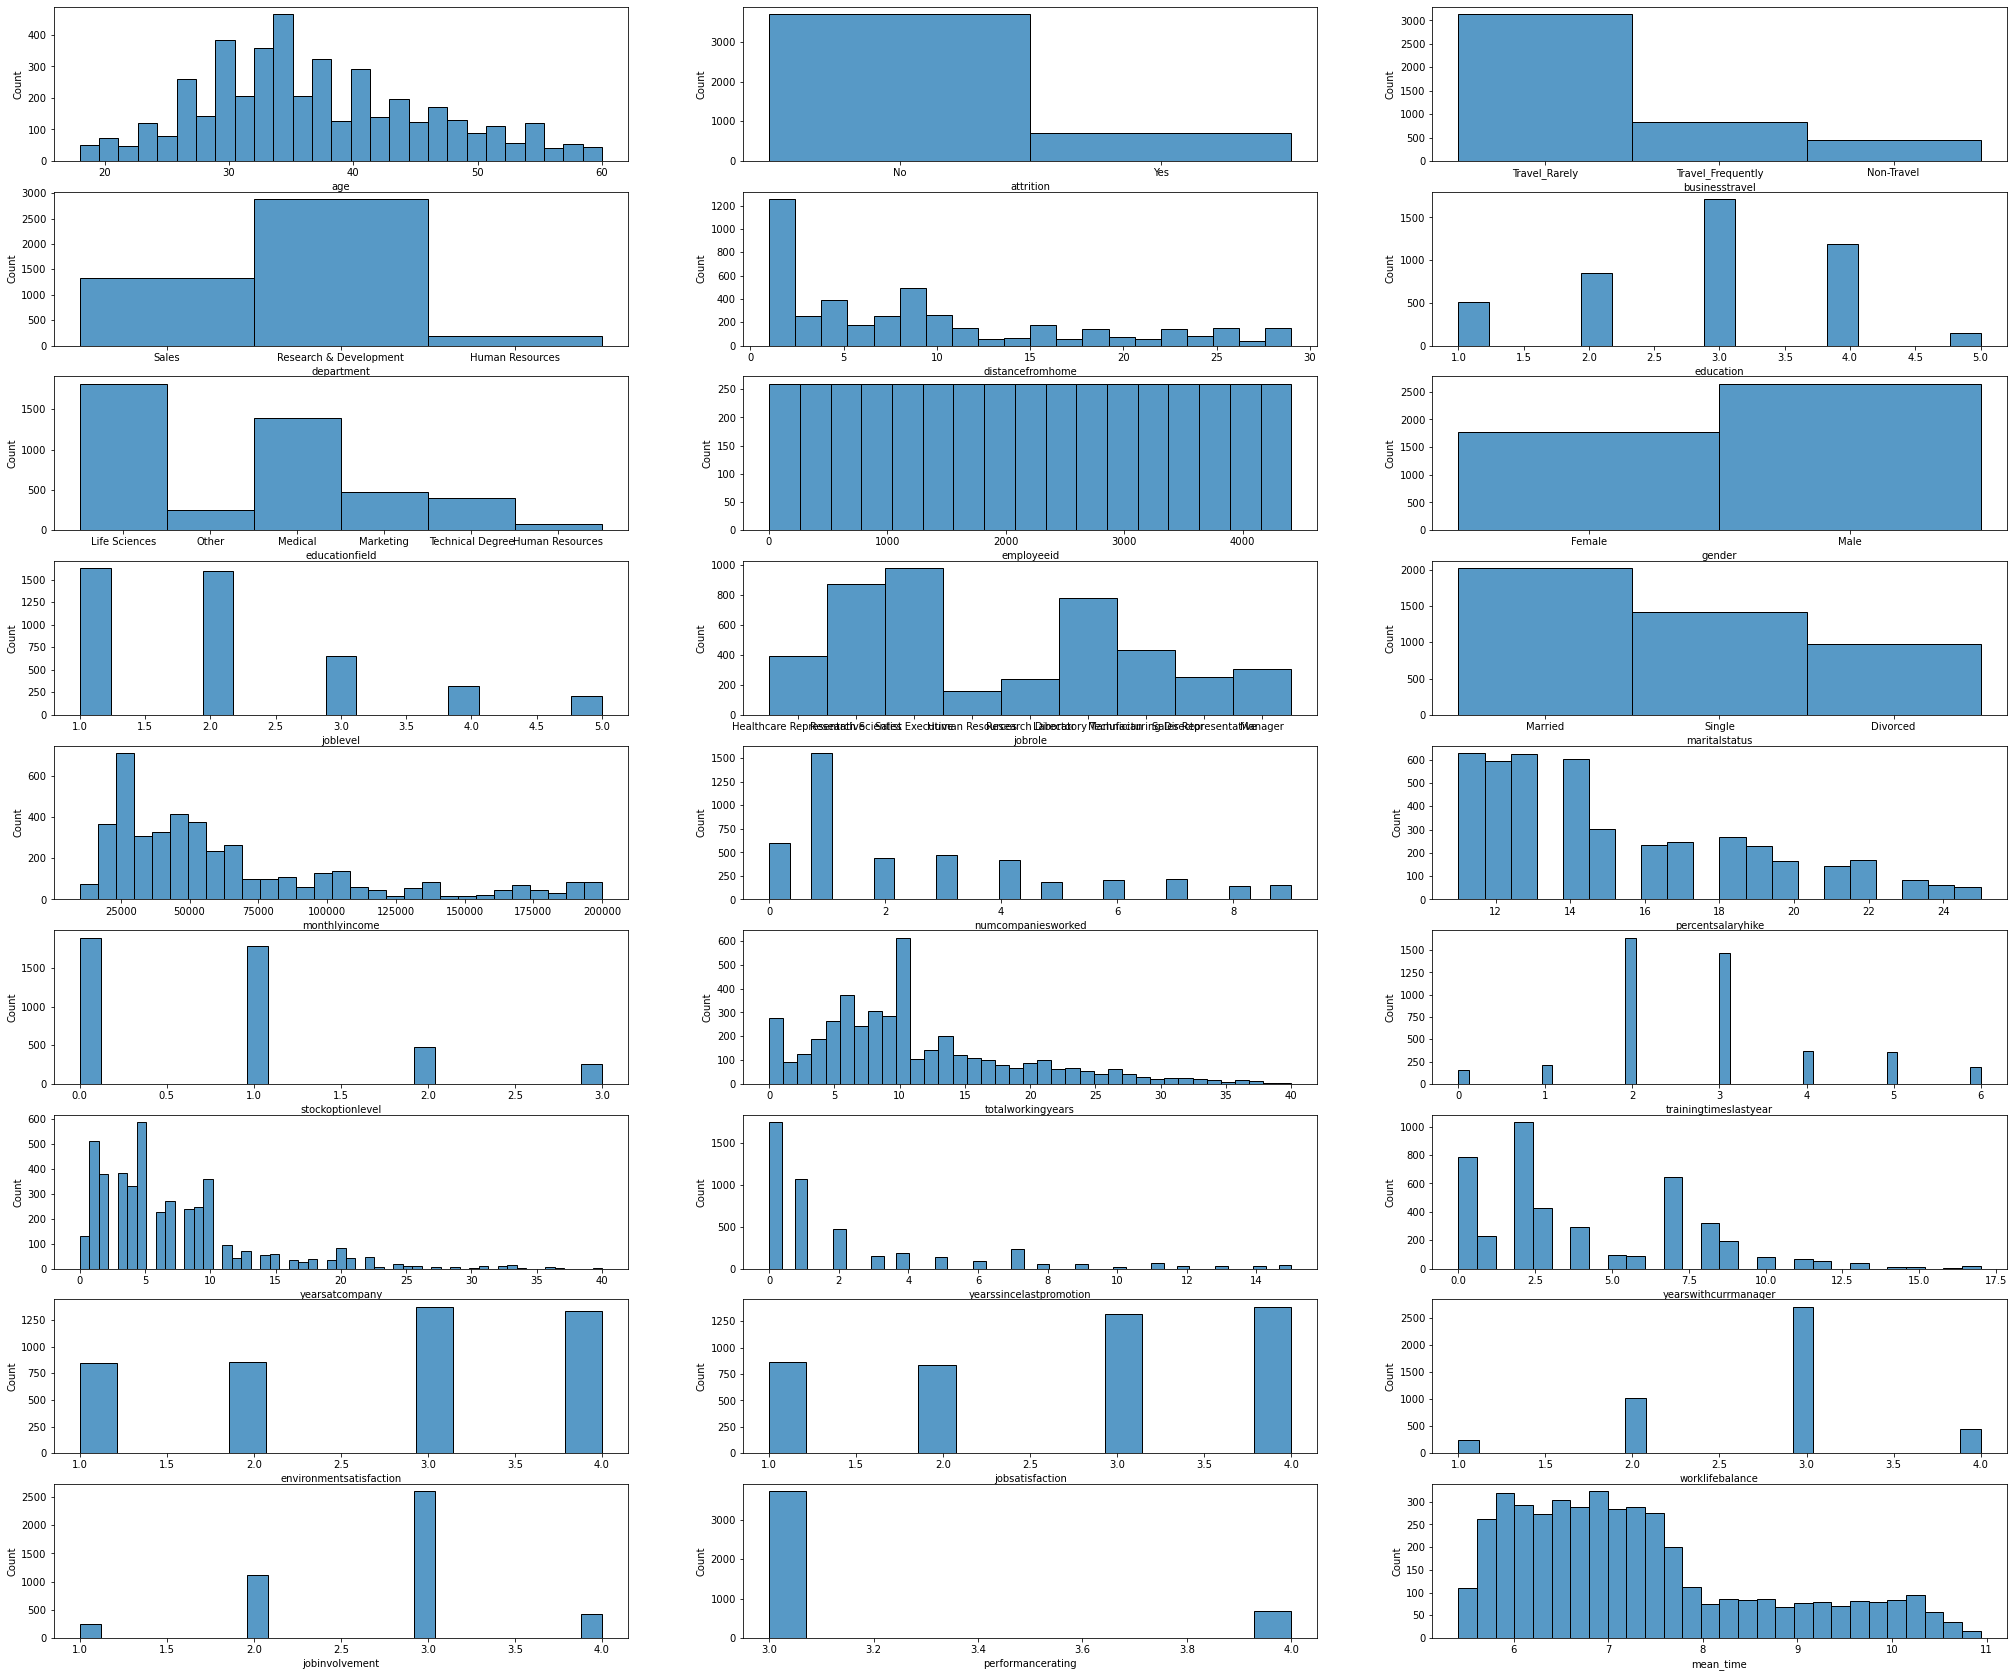

In [95]:
plt.figure(figsize=(35,30))
for i, column in enumerate(general.columns,1):
    plt.subplot(9,3,i)
    sns.histplot(general[column])

In [96]:
# Change type from integer to category for education feature
general['education'] = general['education'].astype('category')

In [97]:
general.dtypes

age                           int64
attrition                    object
businesstravel               object
department                   object
distancefromhome              int64
education                  category
educationfield               object
employeeid                    int64
gender                       object
joblevel                      int64
jobrole                      object
maritalstatus                object
monthlyincome                 int64
numcompaniesworked            int64
percentsalaryhike             int64
stockoptionlevel              int64
totalworkingyears             int64
trainingtimeslastyear         int64
yearsatcompany                int64
yearssincelastpromotion       int64
yearswithcurrmanager          int64
environmentsatisfaction       int64
jobsatisfaction               int64
worklifebalance               int64
jobinvolvement                int64
performancerating             int64
mean_time                   float64
dtype: object

## Change type of categorical features

In [98]:
general[['joblevel','education','stockoptionlevel','environmentsatisfaction', 'jobsatisfaction', 'worklifebalance','jobinvolvement','performancerating']]=general[['joblevel','education','stockoptionlevel','environmentsatisfaction', 'jobsatisfaction', 'worklifebalance','jobinvolvement','performancerating']].astype(object)

In [99]:
general.dtypes

age                          int64
attrition                   object
businesstravel              object
department                  object
distancefromhome             int64
education                   object
educationfield              object
employeeid                   int64
gender                      object
joblevel                    object
jobrole                     object
maritalstatus               object
monthlyincome                int64
numcompaniesworked           int64
percentsalaryhike            int64
stockoptionlevel            object
totalworkingyears            int64
trainingtimeslastyear        int64
yearsatcompany               int64
yearssincelastpromotion      int64
yearswithcurrmanager         int64
environmentsatisfaction     object
jobsatisfaction             object
worklifebalance             object
jobinvolvement              object
performancerating           object
mean_time                  float64
dtype: object

## Numerical features 

In [100]:
numerical = general.select_dtypes(np.number)
numerical = numerical.drop(['employeeid'], axis = 1).reset_index(drop = True)
numerical

,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time
0,51,6,131160,1,11,1,6,1,0,0,6.870229
1,31,10,41890,0,23,6,3,5,1,4,7.315971
2,32,17,193280,1,15,5,2,5,0,3,6.816081
3,38,2,83210,3,11,13,5,8,7,5,6.789215
4,32,10,23420,4,12,9,2,6,0,4,7.877561
...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,60290,3,17,10,5,3,0,2,8.316921
4406,29,2,26790,2,15,10,2,3,0,2,5.897197
4407,25,25,37020,0,20,5,4,4,1,2,7.149526
4408,42,18,23980,0,14,10,2,9,7,8,9.187612


## Standardize numerical features

In [101]:
corr=numerical.corr()
corr

,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time
age,1.000000,0.006963,-0.044314,0.299297,-0.033137,0.680340,-0.027308,0.311309,0.216513,0.202089,-0.000377
distancefromhome,0.006963,1.000000,-0.021607,-0.012617,0.038125,0.009314,-0.009001,0.031684,0.002290,0.021584,0.009928
monthlyincome,-0.044314,-0.021607,1.000000,-0.019915,0.004325,-0.033758,0.050112,0.000995,0.065219,0.024304,-0.012430
numcompaniesworked,0.299297,-0.012617,-0.019915,1.000000,0.031683,0.238774,-0.032123,-0.116322,-0.035421,-0.108223,-0.015705
percentsalaryhike,-0.033137,0.038125,0.004325,0.031683,1.000000,-0.018810,-0.037392,-0.029707,-0.029542,-0.040864,0.026640
totalworkingyears,0.680340,0.009314,-0.033758,0.238774,-0.018810,1.000000,-0.040843,0.626737,0.404015,0.458403,-0.012385
trainingtimeslastyear,-0.027308,-0.009001,0.050112,-0.032123,-0.037392,-0.040843,1.000000,-0.007894,0.016121,-0.013270,-0.007777
yearsatcompany,0.311309,0.031684,0.000995,-0.116322,-0.029707,0.626737,-0.007894,1.000000,0.618409,0.769212,-0.021670
yearssincelastpromotion,0.216513,0.002290,0.065219,-0.035421,-0.029542,0.404015,0.016121,0.618409,1.000000,0.510224,-0.010831
yearswithcurrmanager,0.202089,0.021584,0.024304,-0.108223,-0.040864,0.458403,-0.013270,0.769212,0.510224,1.000000,-0.035379


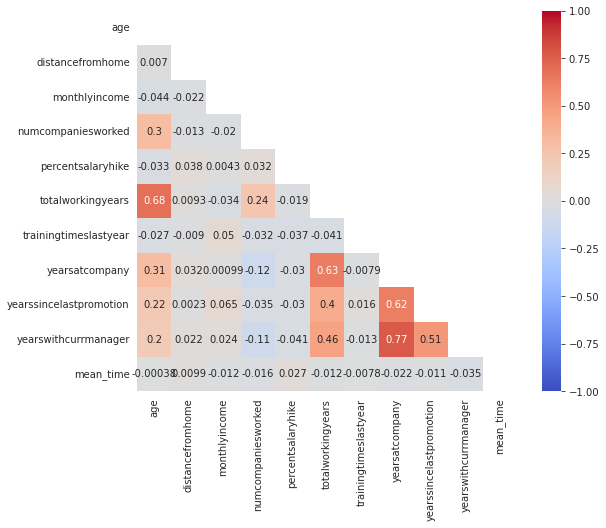

In [102]:
import statsmodels.api as sm
from scipy.stats import boxcox
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax =plt.subplots(figsize=(9, 7))
    multicollinearity_ax = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [103]:
#correlation matrix with target variable: attrition
numerical_targ = pd.concat([numerical, general['attrition']],axis=1)

In [104]:
numerical_targ

,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time,attrition
0,51,6,131160,1,11,1,6,1,0,0,6.870229,No
1,31,10,41890,0,23,6,3,5,1,4,7.315971,Yes
2,32,17,193280,1,15,5,2,5,0,3,6.816081,No
3,38,2,83210,3,11,13,5,8,7,5,6.789215,No
4,32,10,23420,4,12,9,2,6,0,4,7.877561,No
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,60290,3,17,10,5,3,0,2,8.316921,No
4406,29,2,26790,2,15,10,2,3,0,2,5.897197,No
4407,25,25,37020,0,20,5,4,4,1,2,7.149526,No
4408,42,18,23980,0,14,10,2,9,7,8,9.187612,No


In [105]:
#encode attrition
numerical_targ['attrition'] = numerical_targ['attrition'].apply(lambda x:0 if x=="No" else 1)
numerical_targ

,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time,attrition
0,51,6,131160,1,11,1,6,1,0,0,6.870229,0
1,31,10,41890,0,23,6,3,5,1,4,7.315971,1
2,32,17,193280,1,15,5,2,5,0,3,6.816081,0
3,38,2,83210,3,11,13,5,8,7,5,6.789215,0
4,32,10,23420,4,12,9,2,6,0,4,7.877561,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,60290,3,17,10,5,3,0,2,8.316921,0
4406,29,2,26790,2,15,10,2,3,0,2,5.897197,0
4407,25,25,37020,0,20,5,4,4,1,2,7.149526,0
4408,42,18,23980,0,14,10,2,9,7,8,9.187612,0


In [106]:
numerical_targ['attrition'].value_counts()

0    3699
1     711
Name: attrition, dtype: int64

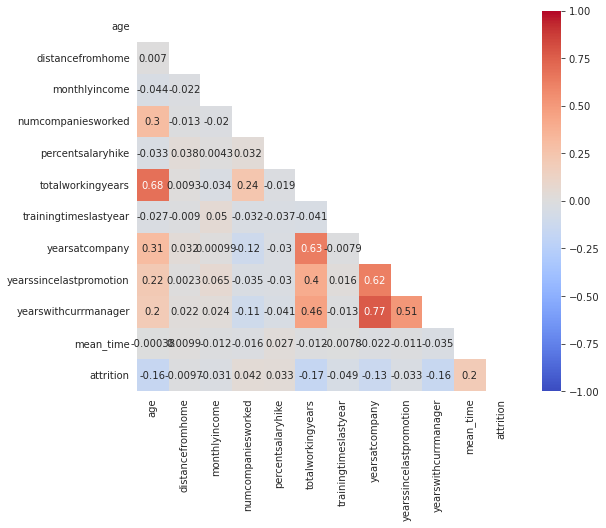

In [107]:
corr=numerical_targ.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax =plt.subplots(figsize=(9, 7))
    multicollinearity_ax = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Modeling

## Numerical features : Logistic regression

### Xy split

In [108]:
X= numerical
y= numerical_targ.attrition

### Train/Test split

In [109]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)
X_train

,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time
3788,30,1,179240,1,13,10,2,10,6,7,6.790409
1915,38,4,100480,1,23,6,2,5,1,3,7.847052
2324,38,2,49080,4,19,7,3,5,1,4,7.460328
1430,45,2,103680,6,12,23,2,19,12,8,6.063931
4141,29,1,42840,4,11,10,5,4,0,3,9.150149
...,...,...,...,...,...,...,...,...,...,...,...
1593,30,3,59680,1,13,1,3,1,0,0,6.372265
4060,42,1,23720,3,12,14,3,0,0,0,8.204401
1346,26,17,48770,1,13,8,5,8,5,7,7.598899
3454,56,1,52280,2,11,18,4,5,0,3,6.559152


### Standardize

In [110]:
std_scaler = StandardScaler().fit(X_train) 

X_train_scaled = std_scaler.transform(X_train)
X_train_scaled

array([[-0.73874464, -1.00946008,  2.41046398, ...,  1.19431606,
         0.82764641, -0.39652985],
       [ 0.13394617, -0.63791586,  0.74342348, ..., -0.36776115,
        -0.31095236,  0.3966209 ],
       [ 0.13394617, -0.88561201, -0.34451306, ..., -0.36776115,
        -0.02630266,  0.10633332],
       ...,
       [-1.17509004,  0.97210907, -0.35107454, ...,  0.88190062,
         0.82764641,  0.21034929],
       [ 2.09750048, -1.00946008, -0.2767816 , ..., -0.68017659,
        -0.31095236, -0.57011924],
       [-0.08422654, -0.51406779, -0.38494027, ..., -0.68017659,
         0.82764641, -1.31175063]])

In [111]:
X_test_scaled=std_scaler.transform(X_test)
X_test_scaled

array([[-0.08422654, -0.51406779, -0.23931764, ...,  1.5067315 ,
         0.82764641, -0.9643893 ],
       [ 0.89755062, -0.88561201, -0.09771656, ...,  0.25706974,
        -0.88025174, -1.3050507 ],
       [ 1.55206873,  1.71519751,  2.69578275, ..., -0.05534571,
         0.82764641,  0.53947905],
       ...,
       [-1.17509004,  0.22902064,  0.58044466, ..., -0.68017659,
        -1.16490143, -0.32286412],
       [ 0.24303252,  1.96289365,  2.78658523, ...,  2.13156239,
         0.54299672, -0.17404462],
       [ 1.66115508, -0.51406779, -0.79937213, ..., -0.68017659,
        -0.02630266, -0.90425908]])

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.845805,0.839002
1,Precision,0.604167,0.666667
2,Recall,0.102837,0.068027


Confusion matrix for the train set
[[2926   38]
 [ 506   58]]


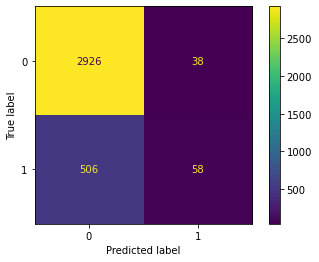



Confusion matrix for the test set
[[730   5]
 [137  10]]


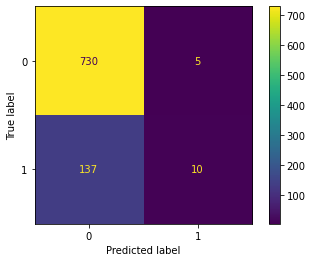

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Categorical features

In [113]:
categorical = general.select_dtypes(include=object)
categorical = categorical.drop(['attrition'], axis=1).reset_index(drop = True)
categorical

,businesstravel,department,education,educationfield,gender,joblevel,jobrole,maritalstatus,stockoptionlevel,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
0,Travel_Rarely,Sales,2,Life Sciences,Female,1,Healthcare Representative,Married,0,3,4,2,3,3
1,Travel_Frequently,Research & Development,1,Life Sciences,Female,1,Research Scientist,Single,1,3,2,4,2,4
2,Travel_Frequently,Research & Development,4,Other,Male,4,Sales Executive,Married,3,2,2,1,3,3
3,Non-Travel,Research & Development,5,Life Sciences,Male,3,Human Resources,Married,3,4,4,3,2,3
4,Travel_Rarely,Research & Development,1,Medical,Male,1,Sales Executive,Single,2,4,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Travel_Rarely,Research & Development,4,Medical,Female,1,Research Scientist,Single,1,4,1,3,3,3
4406,Travel_Rarely,Research & Development,4,Medical,Male,1,Laboratory Technician,Divorced,0,4,4,3,2,3
4407,Travel_Rarely,Research & Development,2,Life Sciences,Male,2,Sales Executive,Married,0,1,3,3,3,4
4408,Travel_Rarely,Sales,2,Medical,Male,1,Laboratory Technician,Divorced,1,4,1,3,2,3


In [114]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

### Ordinal encoding

In [115]:
cat_ord = categorical[['businesstravel']]

In [116]:
categories = [['Non-Travel','Travel_Rarely','Travel_Frequently']]

In [117]:
categorical['education'].value_counts()

3    1716
4    1194
2     846
1     510
5     144
Name: education, dtype: int64

In [118]:
ordinal_encoder = OrdinalEncoder(categories=categories)
cat_ord_encoded = pd.DataFrame(ordinal_encoder.fit_transform(cat_ord),columns=cat_ord.columns)

In [119]:
cat_ord_2 = categorical[['education','joblevel', 'stockoptionlevel', 'environmentsatisfaction','worklifebalance','jobsatisfaction','jobinvolvement','performancerating']]

In [120]:
cat_ord_encoded

,businesstravel
0,1.0
1,2.0
2,2.0
3,0.0
4,1.0
...,...
4405,1.0
4406,1.0
4407,1.0
4408,1.0


In [121]:
cat_ord = pd.concat([cat_ord_2, cat_ord_encoded], axis=1)

In [122]:
cat_ord

,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel
0,2,1,0,3,2,4,3,3,1.0
1,1,1,1,3,4,2,2,4,2.0
2,4,4,3,2,1,2,3,3,2.0
3,5,3,3,4,3,4,2,3,0.0
4,1,1,2,4,3,1,3,3,1.0
...,...,...,...,...,...,...,...,...,...
4405,4,1,1,4,3,1,3,3,1.0
4406,4,1,0,4,3,4,2,3,1.0
4407,2,2,0,1,3,3,3,4,1.0
4408,2,1,1,4,3,1,2,3,1.0


In [123]:
categorical

,businesstravel,department,education,educationfield,gender,joblevel,jobrole,maritalstatus,stockoptionlevel,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
0,Travel_Rarely,Sales,2,Life Sciences,Female,1,Healthcare Representative,Married,0,3,4,2,3,3
1,Travel_Frequently,Research & Development,1,Life Sciences,Female,1,Research Scientist,Single,1,3,2,4,2,4
2,Travel_Frequently,Research & Development,4,Other,Male,4,Sales Executive,Married,3,2,2,1,3,3
3,Non-Travel,Research & Development,5,Life Sciences,Male,3,Human Resources,Married,3,4,4,3,2,3
4,Travel_Rarely,Research & Development,1,Medical,Male,1,Sales Executive,Single,2,4,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,Travel_Rarely,Research & Development,4,Medical,Female,1,Research Scientist,Single,1,4,1,3,3,3
4406,Travel_Rarely,Research & Development,4,Medical,Male,1,Laboratory Technician,Divorced,0,4,4,3,2,3
4407,Travel_Rarely,Research & Development,2,Life Sciences,Male,2,Sales Executive,Married,0,1,3,3,3,4
4408,Travel_Rarely,Sales,2,Medical,Male,1,Laboratory Technician,Divorced,1,4,1,3,2,3


### Nominal Encoding

In [124]:
cat_nom = categorical[['department','educationfield','gender','jobrole','maritalstatus']]
cat_nom

,department,educationfield,gender,jobrole,maritalstatus
0,Sales,Life Sciences,Female,Healthcare Representative,Married
1,Research & Development,Life Sciences,Female,Research Scientist,Single
2,Research & Development,Other,Male,Sales Executive,Married
3,Research & Development,Life Sciences,Male,Human Resources,Married
4,Research & Development,Medical,Male,Sales Executive,Single
...,...,...,...,...,...
4405,Research & Development,Medical,Female,Research Scientist,Single
4406,Research & Development,Medical,Male,Laboratory Technician,Divorced
4407,Research & Development,Life Sciences,Male,Sales Executive,Married
4408,Sales,Medical,Male,Laboratory Technician,Divorced


In [125]:
cat_nom_encoded = pd.get_dummies(cat_nom)
cat_nom_encoded

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4406,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4407,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4408,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [126]:
cat_encoded = pd.concat([cat_nom_encoded, cat_ord], axis=1)

In [127]:
cat_encoded

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1.0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2.0
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2.0
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0.0
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4,1,1,4,3,1,3,3,1.0
4406,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4,1,0,4,3,4,2,3,1.0
4407,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,3,3,3,4,1.0
4408,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,1,1,4,3,1,2,3,1.0


## Numerical and categorical features: logistic regression

In [128]:
## General merge (All features)

In [129]:
hr = pd.concat([cat_encoded, numerical_targ], axis=1)
hr

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time,attrition
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1.0,51,6,131160,1,11,1,6,1,0,0,6.870229,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2.0,31,10,41890,0,23,6,3,5,1,4,7.315971,1
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2.0,32,17,193280,1,15,5,2,5,0,3,6.816081,0
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0.0,38,2,83210,3,11,13,5,8,7,5,6.789215,0
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1.0,32,10,23420,4,12,9,2,6,0,4,7.877561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4,1,1,4,3,1,3,3,1.0,42,5,60290,3,17,10,5,3,0,2,8.316921,0
4406,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4,1,0,4,3,4,2,3,1.0,29,2,26790,2,15,10,2,3,0,2,5.897197,0
4407,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,3,3,3,4,1.0,25,25,37020,0,20,5,4,4,1,2,7.149526,0
4408,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,1,1,4,3,1,2,3,1.0,42,18,23980,0,14,10,2,9,7,8,9.187612,0


### Xy split

In [130]:
X = hr.iloc[:,:-1]
X

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1.0,51,6,131160,1,11,1,6,1,0,0,6.870229
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2.0,31,10,41890,0,23,6,3,5,1,4,7.315971
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2.0,32,17,193280,1,15,5,2,5,0,3,6.816081
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0.0,38,2,83210,3,11,13,5,8,7,5,6.789215
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1.0,32,10,23420,4,12,9,2,6,0,4,7.877561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4,1,1,4,3,1,3,3,1.0,42,5,60290,3,17,10,5,3,0,2,8.316921
4406,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4,1,0,4,3,4,2,3,1.0,29,2,26790,2,15,10,2,3,0,2,5.897197
4407,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,3,3,3,4,1.0,25,25,37020,0,20,5,4,4,1,2,7.149526
4408,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,1,1,4,3,1,2,3,1.0,42,18,23980,0,14,10,2,9,7,8,9.187612


In [131]:
y = hr.iloc[:,-1]
y

0       0
1       1
2       0
3       0
4       0
       ..
4405    0
4406    0
4407    0
4408    0
4409    0
Name: attrition, Length: 4410, dtype: int64

### Train/test split

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LogisticRegression()

(4410, 43)
(4410,)


In [133]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.84135977, 0.84419263, 0.85269122, 0.84255319, 0.85248227])

In [134]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.85 accuracy with a standard deviation of 0.00


### Standardize

In [135]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.867630,0.849206
1,Precision,0.700441,0.656250
2,Recall,0.284946,0.274510


Confusion matrix for the train set
[[2902   68]
 [ 399  159]]


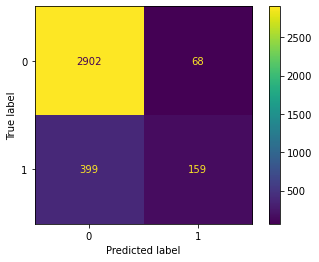



Confusion matrix for the test set
[[707  22]
 [111  42]]


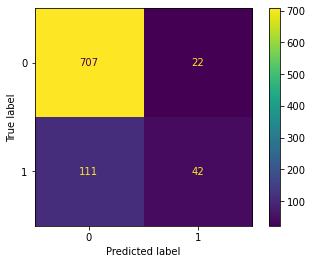

In [136]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Handling outliers numerical

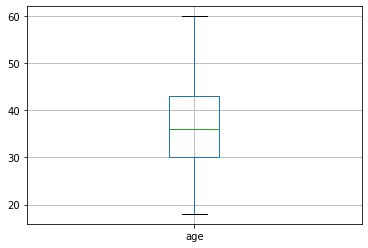

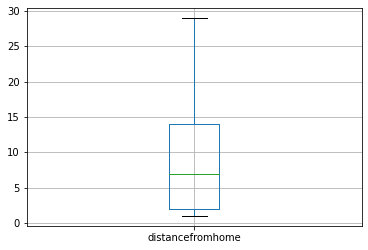

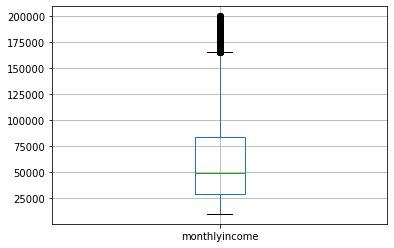

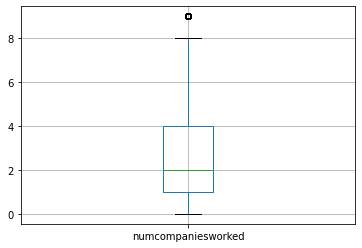

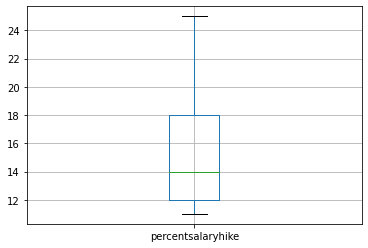

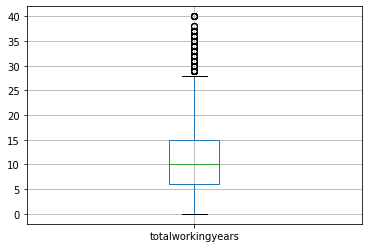

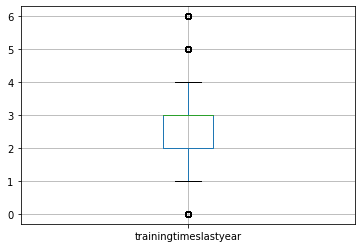

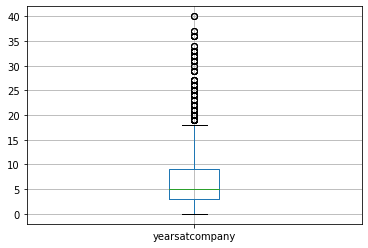

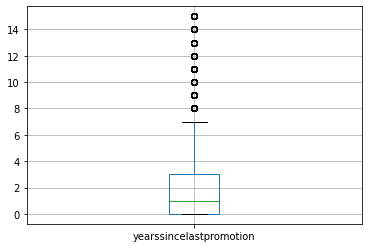

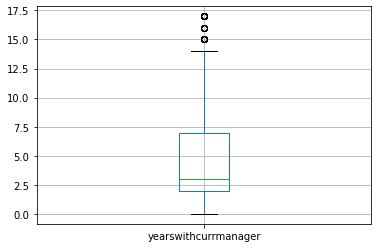

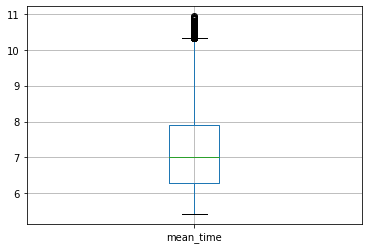

In [137]:
for column in numerical:
    plt.figure()
    numerical.boxplot([column])

### IQR

In [138]:
def outliers(hr, columns_list):
    for col in columns_list:
        Q1= hr[col].quantile(0.25)
        Q3 = hr[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR

        print(upper_limit)
        new_hr = hr[(hr[col] < upper_limit) & (hr[col] > lower_limit)]
    return new_hr.reset_index(drop=True)


new_hr = outliers(hr,['monthlyincome','numcompaniesworked','totalworkingyears','trainingtimeslastyear',
                     'yearsatcompany','yearssincelastpromotion','yearswithcurrmanager','mean_time'])

165835.0
8.5
28.5
4.5
18.0
7.5
14.5
10.332849871708925


In [139]:
new_hr

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time,attrition
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1.0,51,6,131160,1,11,1,6,1,0,0,6.870229,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2.0,31,10,41890,0,23,6,3,5,1,4,7.315971,1
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2.0,32,17,193280,1,15,5,2,5,0,3,6.816081,0
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0.0,38,2,83210,3,11,13,5,8,7,5,6.789215,0
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1.0,32,10,23420,4,12,9,2,6,0,4,7.877561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4,1,1,4,3,1,3,3,1.0,42,5,60290,3,17,10,5,3,0,2,8.316921,0
4287,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4,1,0,4,3,4,2,3,1.0,29,2,26790,2,15,10,2,3,0,2,5.897197,0
4288,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,3,3,3,4,1.0,25,25,37020,0,20,5,4,4,1,2,7.149526,0
4289,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,1,1,4,3,1,2,3,1.0,42,18,23980,0,14,10,2,9,7,8,9.187612,0


### Log without outliers

In [140]:
X = new_hr.iloc[:,:-1]
X

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1.0,51,6,131160,1,11,1,6,1,0,0,6.870229
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2.0,31,10,41890,0,23,6,3,5,1,4,7.315971
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2.0,32,17,193280,1,15,5,2,5,0,3,6.816081
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0.0,38,2,83210,3,11,13,5,8,7,5,6.789215
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1.0,32,10,23420,4,12,9,2,6,0,4,7.877561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4,1,1,4,3,1,3,3,1.0,42,5,60290,3,17,10,5,3,0,2,8.316921
4287,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4,1,0,4,3,4,2,3,1.0,29,2,26790,2,15,10,2,3,0,2,5.897197
4288,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,3,3,3,4,1.0,25,25,37020,0,20,5,4,4,1,2,7.149526
4289,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,1,1,4,3,1,2,3,1.0,42,18,23980,0,14,10,2,9,7,8,9.187612


In [141]:
y= new_hr.iloc[:,-1]
y

0       0
1       1
2       0
3       0
4       0
       ..
4286    0
4287    0
4288    0
4289    0
4290    0
Name: attrition, Length: 4291, dtype: int64

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LogisticRegression()

(4291, 43)
(4291,)


In [143]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.84133916, 0.83406114, 0.8425656 , 0.84110787, 0.84693878])

In [144]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.00


In [145]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

#### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.869755,0.856810
1,Precision,0.721461,0.650000
2,Recall,0.290441,0.276596


Confusion matrix for the train set
[[2827   61]
 [ 386  158]]


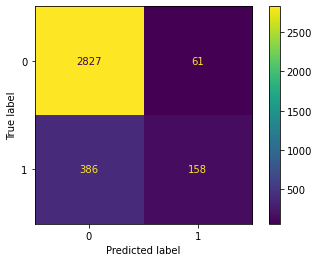



Confusion matrix for the test set
[[697  21]
 [102  39]]


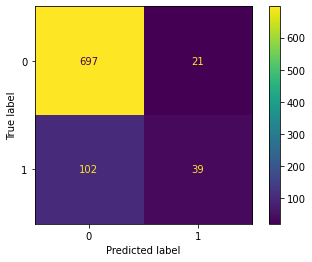

In [146]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Upsampling: SMOTE

### With outliers

In [147]:
# SMOTE works only on numeric values, so let's transform them
hr

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time,attrition
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1.0,51,6,131160,1,11,1,6,1,0,0,6.870229,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2.0,31,10,41890,0,23,6,3,5,1,4,7.315971,1
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2.0,32,17,193280,1,15,5,2,5,0,3,6.816081,0
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0.0,38,2,83210,3,11,13,5,8,7,5,6.789215,0
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1.0,32,10,23420,4,12,9,2,6,0,4,7.877561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4,1,1,4,3,1,3,3,1.0,42,5,60290,3,17,10,5,3,0,2,8.316921,0
4406,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,4,1,0,4,3,4,2,3,1.0,29,2,26790,2,15,10,2,3,0,2,5.897197,0
4407,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,3,3,3,4,1.0,25,25,37020,0,20,5,4,4,1,2,7.149526,0
4408,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,1,1,4,3,1,2,3,1.0,42,18,23980,0,14,10,2,9,7,8,9.187612,0


In [148]:
hr.dtypes

department_Human Resources             uint8
department_Research & Development      uint8
department_Sales                       uint8
educationfield_Human Resources         uint8
educationfield_Life Sciences           uint8
educationfield_Marketing               uint8
educationfield_Medical                 uint8
educationfield_Other                   uint8
educationfield_Technical Degree        uint8
gender_Female                          uint8
gender_Male                            uint8
jobrole_Healthcare Representative      uint8
jobrole_Human Resources                uint8
jobrole_Laboratory Technician          uint8
jobrole_Manager                        uint8
jobrole_Manufacturing Director         uint8
jobrole_Research Director              uint8
jobrole_Research Scientist             uint8
jobrole_Sales Executive                uint8
jobrole_Sales Representative           uint8
maritalstatus_Divorced                 uint8
maritalstatus_Married                  uint8
maritalsta

In [149]:
hr.iloc[:, 23:32] = hr.iloc[:, 23:32].astype(int)

In [150]:
hr.dtypes

department_Human Resources             uint8
department_Research & Development      uint8
department_Sales                       uint8
educationfield_Human Resources         uint8
educationfield_Life Sciences           uint8
educationfield_Marketing               uint8
educationfield_Medical                 uint8
educationfield_Other                   uint8
educationfield_Technical Degree        uint8
gender_Female                          uint8
gender_Male                            uint8
jobrole_Healthcare Representative      uint8
jobrole_Human Resources                uint8
jobrole_Laboratory Technician          uint8
jobrole_Manager                        uint8
jobrole_Manufacturing Director         uint8
jobrole_Research Director              uint8
jobrole_Research Scientist             uint8
jobrole_Sales Executive                uint8
jobrole_Sales Representative           uint8
maritalstatus_Divorced                 uint8
maritalstatus_Married                  uint8
maritalsta

In [151]:
X= hr.iloc[:,:-1]
y= hr.iloc[:,-1]

In [152]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [153]:
y.value_counts()

0    3699
1     711
Name: attrition, dtype: int64

In [154]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    3699
1    3699
Name: attrition, dtype: int64

In [155]:
X= X_sm
y= y_sm

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LogisticRegression()

In [157]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.72635135, 0.50168919, 0.75168919, 0.68977177, 0.70076078])

In [158]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.67 accuracy with a standard deviation of 0.09


In [159]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.818520,0.832432
1,Precision,0.861550,0.883792
2,Recall,0.757545,0.770667


Confusion matrix for the train set
[[2610  359]
 [ 715 2234]]


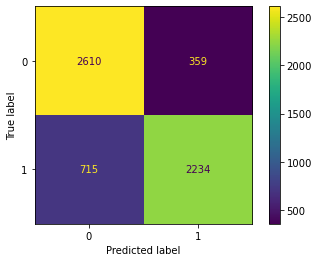



Confusion matrix for the test set
[[654  76]
 [172 578]]


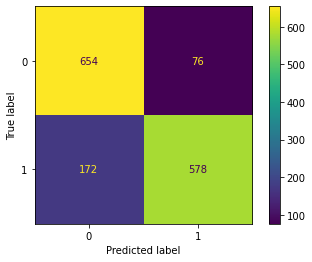

In [160]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

### Without outliers

In [161]:
#convert all object into int also in new_hr, dataframe without outliers
new_hr.iloc[:, 23:32] = new_hr.iloc[:, 23:32].astype(int)

In [162]:
X= new_hr.iloc[:,:-1]
y=new_hr.iloc[:,-1]

In [163]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    3606
1    3606
Name: attrition, dtype: int64

In [164]:
X= X_sm
y= y_sm

In [165]:
#assigning the SMOTE dataframe () --> for ROC
hr_up = pd.concat([X_sm, y_sm], axis=1)
hr_up['attrition'].value_counts()
hr_up

,department_Human Resources,department_Research & Development,department_Sales,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,education,joblevel,stockoptionlevel,environmentsatisfaction,worklifebalance,jobsatisfaction,jobinvolvement,performancerating,businesstravel,age,distancefromhome,monthlyincome,numcompaniesworked,percentsalaryhike,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,mean_time,attrition
0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,2,4,3,3,1,51,6,131160,1,11,1,6,1,0,0,6.870229,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,3,4,2,2,4,2,31,10,41890,0,23,6,3,5,1,4,7.315971,1
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,4,3,2,1,2,3,3,2,32,17,193280,1,15,5,2,5,0,3,6.816081,0
3,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5,3,3,4,3,4,2,3,0,38,2,83210,3,11,13,5,8,7,5,6.789215,0
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,2,4,3,1,3,3,1,32,10,23420,4,12,9,2,6,0,4,7.877561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,3,3,2,3,1,24,12,20142,1,16,3,2,3,0,2,6.657346,1
7208,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,3,2,3,2,3,1,33,2,11129,8,18,6,2,2,0,1,7.914298,1
7209,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,3,2,0,3,3,4,3,4,1,53,19,25590,0,25,34,2,33,1,9,6.280430,1
7210,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,4,1,2,4,2,28,10,41885,0,22,4,3,3,0,3,7.063848,1


In [166]:
X= hr_up.iloc[:,:-1]
y=hr_up.iloc[:,-1]

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LogisticRegression()

In [168]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.70363951, 0.60225303, 0.72790295, 0.71317158, 0.7415438 ])

In [169]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 accuracy with a standard deviation of 0.05


In [170]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.824060,0.828136
1,Precision,0.867681,0.873171
2,Recall,0.766816,0.759547


Confusion matrix for the train set
[[2531  339]
 [ 676 2223]]


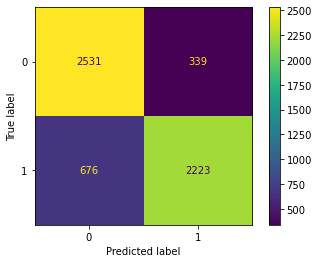



Confusion matrix for the test set
[[658  78]
 [170 537]]


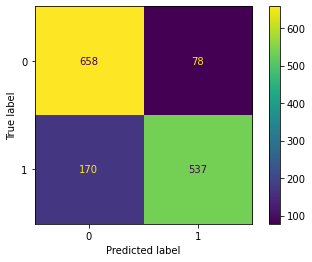

In [171]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Random forest

In [172]:
#from now until 20 most important features hr_up smote, no outliers
X= hr_up.iloc[:,:-1]
y=hr_up.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=10, random_state=0)

In [173]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.97833622, 0.97053726, 0.97227036, 0.97227036, 0.97398092])

In [174]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.00


In [175]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [176]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=10,random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9923730282544635
0.9861399861399861


In [177]:
#from sklearn.model_selection import GridSearchCV
#param_grid = {
    #'n_estimators': [100,200],
    #'max_depth': [8, 10],
    #'max_features': ['sqrt', 'log2']

    #}
#clf = RandomForestClassifier(random_state=100)

In [178]:
#grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [179]:
#grid_search.fit(X_train,y_train)

In [180]:
#grid_search.best_params_

In [181]:
## newforest with suggested parameters
#clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100, random_state=0)
#clf.fit(X_train, y_train)
#print(clf.score(X_train, y_train))
#print(clf.score(X_test, y_test))

In [182]:
#Calculating the mean of scores
#from sklearn.model_selection import cross_val_score
#clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100, random_state=0)
#cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
#print(np.mean(cross_val_scores))

### Features importance

In [183]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [184]:
new_hr_feat_imp = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
new_hr_feat_imp.columns = ['columns_name', 'score_feature_importance']
sorted_feat = new_hr_feat_imp.sort_values(by=['score_feature_importance'], ascending = False)

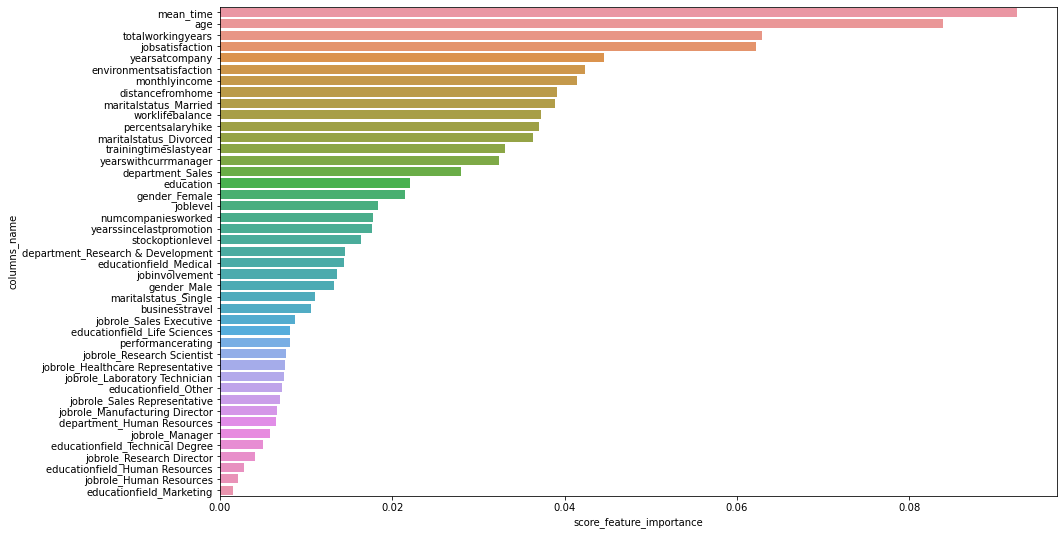

In [185]:
plot= sns.barplot(x=sorted_feat.score_feature_importance, y=sorted_feat.columns_name)
plt.gcf().set_size_inches(15,9)

In [186]:
hr_up.to_csv("Data/hr_up_df.csv")

In [187]:
hr_up[['mean_time','attrition']].groupby('attrition').mean()

,mean_time
attrition,
0,7.111929
1,7.766838


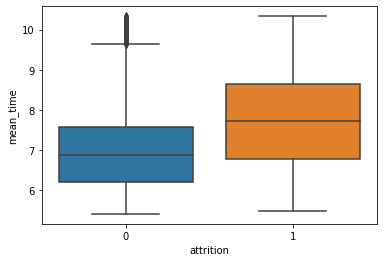

In [188]:
plot= sns.boxplot(y='mean_time',x= 'attrition', data=hr_up)

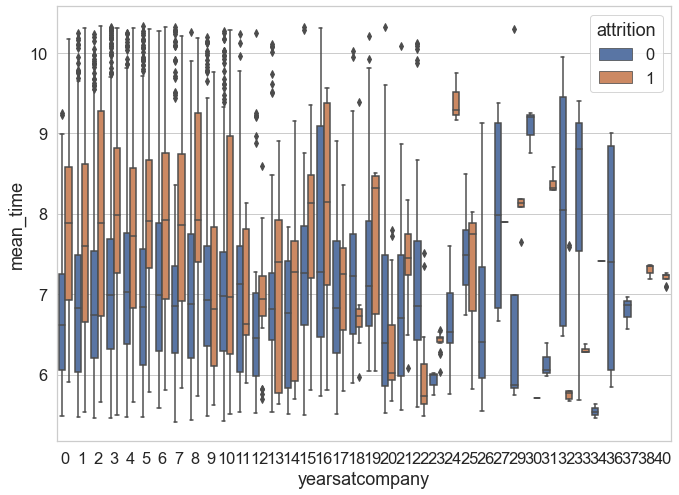

In [189]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
plot= sns.boxplot(y='mean_time',x='yearsatcompany', hue = 'attrition', data=hr_up)

## KNN (all features new_hr)

### XY split

In [190]:
X= hr_up.iloc[:,:-1]
y=hr_up.iloc[:,-1]

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [192]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
scores=cross_val_score(neigh, X_train, y_train, cv=5)
scores

array([0.89428076, 0.87435009, 0.88908146, 0.89254766, 0.86816999])

In [193]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.01


In [194]:
y_pred = cross_val_predict(neigh, X_test, y_test, cv=5)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

### Standardize

In [195]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [196]:
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

trans = PowerTransformer()
trans.fit(X_train)

X_train_k = trans.transform(X_train)
X_test_k  = trans.transform(X_test)

X_train_k = pd.DataFrame(X_train, columns = X.columns)
X_test_k  = pd.DataFrame(X_test,  columns = X.columns)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


### KNN model

,Error_metric,Train,Test
0,Accuracy,0.972266,0.906445
1,Precision,0.987175,0.905634
2,Recall,0.957168,0.904360


Confusion matrix for the train set
[[2838   36]
 [ 124 2771]]


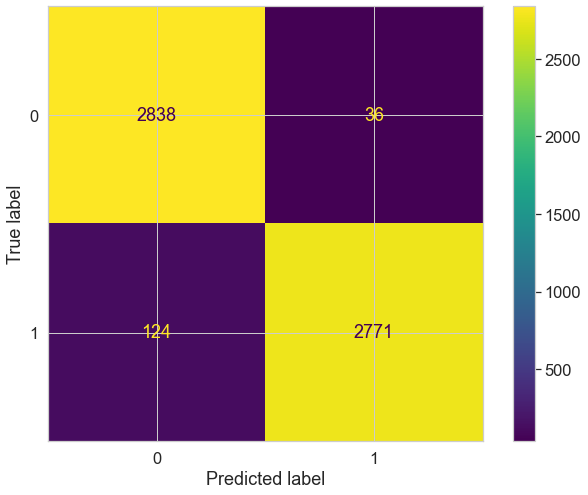



Confusion matrix for the test set
[[665  67]
 [ 68 643]]


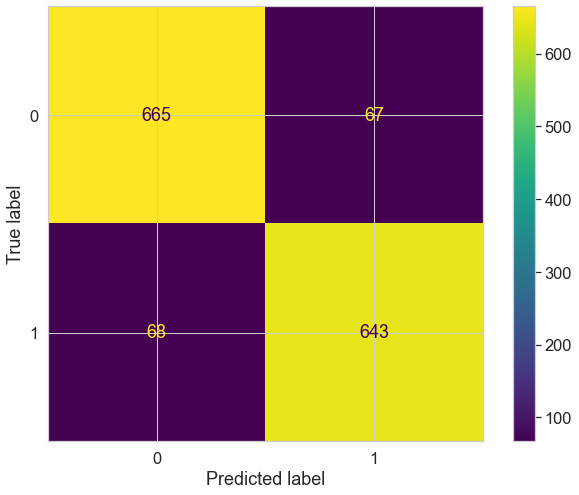

In [197]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_k, y_train)
y_pred_train_knn = neigh.predict(X_train_k)
y_pred_test_knn = neigh.predict(X_test_k)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_k,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test_k,y_test, values_format = 'd')
plt.show()

## ROC all features

In [198]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


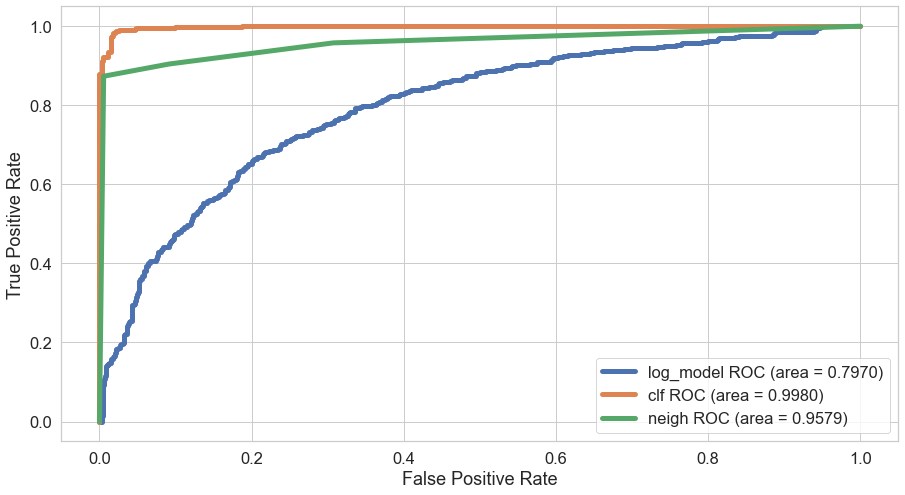

In [199]:
plt.figure(figsize=(15,8))

models = [{'label': 'log_model',
           'model': LogisticRegression()},
          {'label': 'clf',
           'model': RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=10,bootstrap=True,oob_score=True, random_state=0)},
          {'label': 'neigh',
           'model':  KNeighborsClassifier(n_neighbors=3)}]
           
           #'label': 'log_model_20',
           #'model': LogisticRegression(),
           
           #'label': 'neigh_20',
           #'model':  KNeighborsClassifier(n_neighbors=3),}]

#iterate each model
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    
    prob =  model.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, prob)
     
    auc = roc_auc_score(y_test, prob)
    
    pyplot.plot(fpr,tpr, label=f"{m['label']} ROC (area = {auc:.4f})", linewidth=5)
    # axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
    # show the legend
pyplot.legend()
    # show the plot
pyplot.show()

## 20 most important features (mif): Logistic Regression:

In [200]:
#filtering the most important features
hr_feat = hr_up.filter(['mean_time','totalworkingyears','age','jobsatisfaction','yearswithcurrmanager','yearsatcompany','monthlyincome','maritalstatus_Married','maritalstatus_Divorced','enviromentsatisfaction','distancefromhome','trainingtimeslastyear','percentsalaryhike','worklifebalance', 'yearssincelastpromotion','numcompaniesworked','education','gender_Female','joblevel','stockoptionlevel' ,'attrition'], axis=1)
hr_feat

,mean_time,totalworkingyears,age,jobsatisfaction,yearswithcurrmanager,yearsatcompany,monthlyincome,maritalstatus_Married,maritalstatus_Divorced,distancefromhome,trainingtimeslastyear,percentsalaryhike,worklifebalance,yearssincelastpromotion,numcompaniesworked,education,gender_Female,joblevel,stockoptionlevel,attrition
0,6.870229,1,51,4,0,1,131160,1,0,6,6,11,2,0,1,2,1,1,0,0
1,7.315971,6,31,2,4,5,41890,0,0,10,3,23,4,1,0,1,1,1,1,1
2,6.816081,5,32,2,3,5,193280,1,0,17,2,15,1,0,1,4,0,4,3,0
3,6.789215,13,38,4,5,8,83210,1,0,2,5,11,3,7,3,5,0,3,3,0
4,7.877561,9,32,1,4,6,23420,0,0,10,2,12,3,0,4,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,6.657346,3,24,3,2,3,20142,1,0,12,2,16,3,0,1,2,1,1,0,1
7208,7.914298,6,33,3,1,2,11129,0,0,2,2,18,2,0,8,2,0,2,0,1
7209,6.280430,34,53,4,9,33,25590,1,0,19,2,25,3,1,0,3,0,2,0,1
7210,7.063848,4,28,1,3,3,41885,0,0,10,3,22,4,0,0,1,0,1,1,1


In [201]:
hr_feat.to_csv("Data/hr_feat_df.csv")

### XY Split

In [202]:
X = hr_feat.iloc[:,:-1]
X

,mean_time,totalworkingyears,age,jobsatisfaction,yearswithcurrmanager,yearsatcompany,monthlyincome,maritalstatus_Married,maritalstatus_Divorced,distancefromhome,trainingtimeslastyear,percentsalaryhike,worklifebalance,yearssincelastpromotion,numcompaniesworked,education,gender_Female,joblevel,stockoptionlevel
0,6.870229,1,51,4,0,1,131160,1,0,6,6,11,2,0,1,2,1,1,0
1,7.315971,6,31,2,4,5,41890,0,0,10,3,23,4,1,0,1,1,1,1
2,6.816081,5,32,2,3,5,193280,1,0,17,2,15,1,0,1,4,0,4,3
3,6.789215,13,38,4,5,8,83210,1,0,2,5,11,3,7,3,5,0,3,3
4,7.877561,9,32,1,4,6,23420,0,0,10,2,12,3,0,4,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,6.657346,3,24,3,2,3,20142,1,0,12,2,16,3,0,1,2,1,1,0
7208,7.914298,6,33,3,1,2,11129,0,0,2,2,18,2,0,8,2,0,2,0
7209,6.280430,34,53,4,9,33,25590,1,0,19,2,25,3,1,0,3,0,2,0
7210,7.063848,4,28,1,3,3,41885,0,0,10,3,22,4,0,0,1,0,1,1


In [203]:
y= hr_feat.iloc[:,-1]
y

0       0
1       1
2       0
3       0
4       0
       ..
7207    1
7208    1
7209    1
7210    1
7211    1
Name: attrition, Length: 7212, dtype: int64

In [204]:
y.value_counts()

0    3606
1    3606
Name: attrition, dtype: int64

### Train/Test Split

In [205]:
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
log_model_20 = LogisticRegression()

(7212, 19)
(7212,)


In [206]:
scores=cross_val_score(log_model_20, X_train, y_train, cv=5)
scores

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.61958406, 0.71403813, 0.70363951, 0.75043328, 0.70598439])

In [207]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 accuracy with a standard deviation of 0.04


### Standardize

In [208]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.771018,0.758836
1,Precision,0.779901,0.766117
2,Recall,0.759215,0.726885


Confusion matrix for the train set
[[2244  622]
 [ 699 2204]]


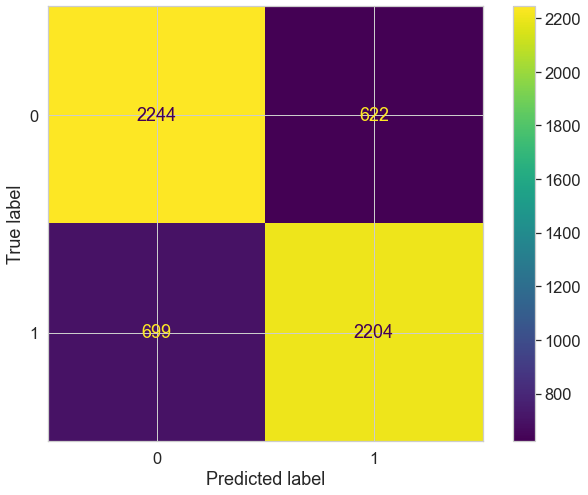



Confusion matrix for the test set
[[584 156]
 [192 511]]


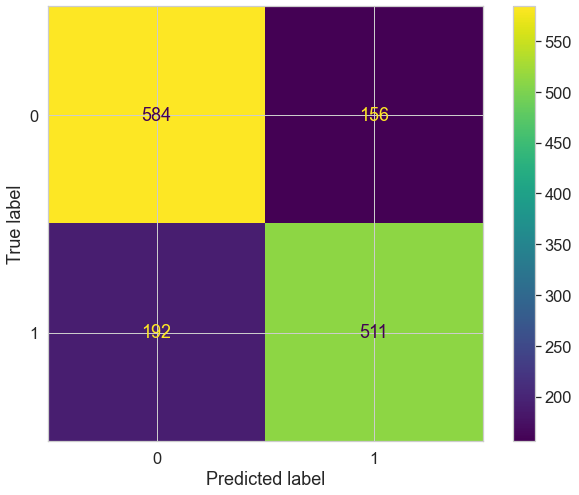

In [209]:
log_model_20 = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model_20.fit(X_train_mod, y_train)

y_pred_train_log = log_model_20.predict(X_train_mod)
y_pred_test_log = log_model_20.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model_20,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model_20,X_test_mod,y_test, values_format = 'd')
plt.show()

## 20 mif: Random Forest

In [210]:
model = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=10, random_state=0)

In [211]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.95233969, 0.95667244, 0.96533795, 0.96533795, 0.95576756])

In [212]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.01


In [213]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [214]:
from sklearn.ensemble import RandomForestClassifier
clf_20 = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=10,random_state=0)
clf_20.fit(X_train, y_train)
print(clf_20.score(X_train, y_train))
print(clf_20.score(X_test, y_test))

#high score. no need to improve the model

0.9819726122378228
0.9618849618849619


In [215]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [216]:
new_hr_feat_imp = pd.DataFrame(list(zip(feature_names, clf_20.feature_importances_)))
new_hr_feat_imp.columns = ['columns_name', 'score_feature_importance']
sorted_feat = new_hr_feat_imp.sort_values(by=['score_feature_importance'], ascending = False)

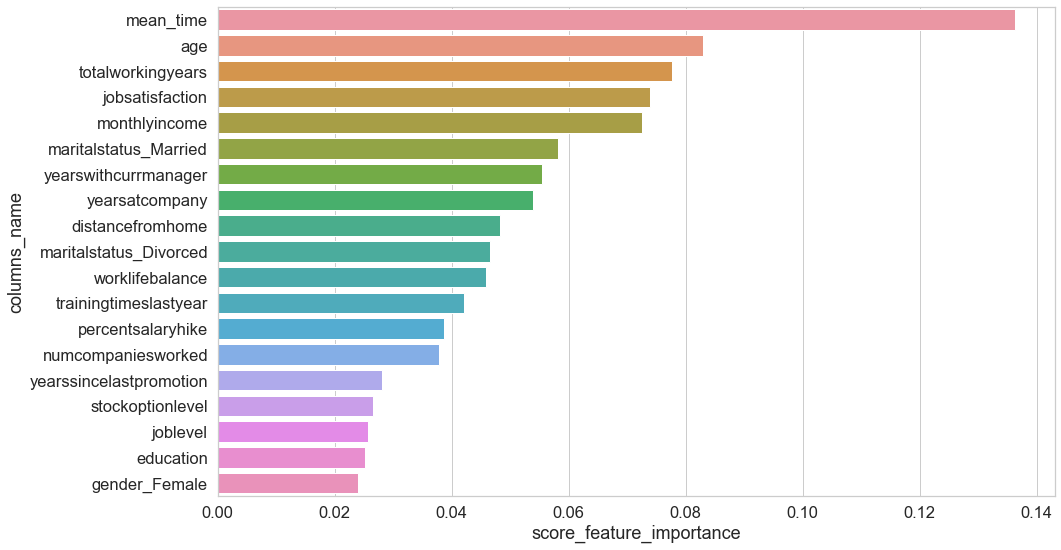

In [217]:
plot= sns.barplot(x=sorted_feat.score_feature_importance, y=sorted_feat.columns_name)
plt.gcf().set_size_inches(15,9)

## 20 mif: KNN

In [218]:
from sklearn.neighbors import KNeighborsClassifier
neigh_20 = KNeighborsClassifier(n_neighbors=3)
scores=cross_val_score(neigh_20, X_train, y_train, cv=5)
scores

array([0.89688042, 0.87954939, 0.89428076, 0.8830156 , 0.86470078])

In [219]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.01


In [220]:
y_pred = cross_val_predict(neigh_20, X_test, y_test, cv=5)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [221]:
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

trans = PowerTransformer()
trans.fit(X_train)

X_train_k = trans.transform(X_train)
X_test_k  = trans.transform(X_test)

X_train_k = pd.DataFrame(X_train, columns = X.columns)
X_test_k  = pd.DataFrame(X_test,  columns = X.columns)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,Error_metric,Train,Test
0,Accuracy,0.970879,0.917533
1,Precision,0.989968,0.919540
2,Recall,0.951774,0.910384


Confusion matrix for the train set
[[2838   28]
 [ 140 2763]]


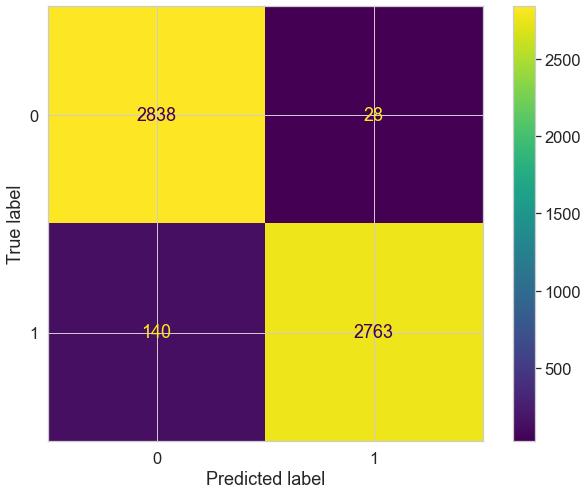



Confusion matrix for the test set
[[684  56]
 [ 63 640]]


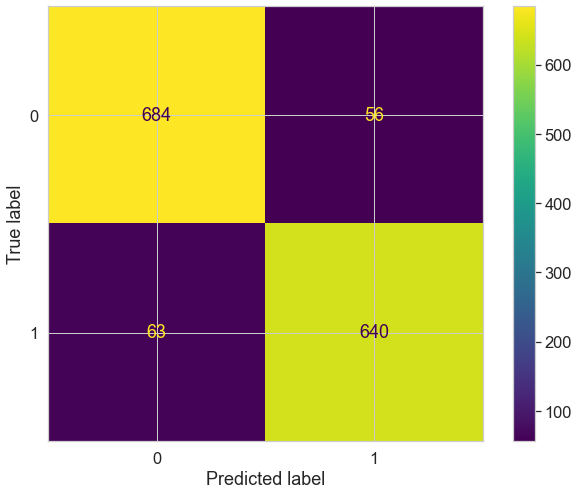

In [222]:
neigh_20 = KNeighborsClassifier(n_neighbors=3)
neigh_20.fit(X_train_k, y_train)
y_pred_train_knn = neigh_20.predict(X_train_k)
y_pred_test_knn = neigh_20.predict(X_test_k)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh_20,X_train_k,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh_20,X_test_k,y_test, values_format = 'd')
plt.show()

## 20 mif : ROC Curve

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


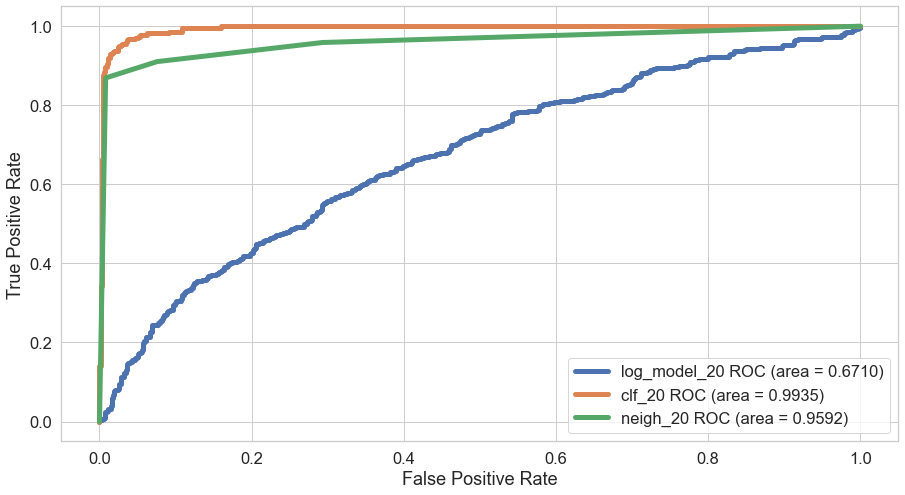

In [223]:
plt.figure(figsize=(15,8))

models = [{'label': 'log_model_20',
           'model': LogisticRegression()},
          {'label': 'clf_20',
           'model': RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=10,bootstrap=True,oob_score=True, random_state=0)},
          {'label': 'neigh_20',
           'model':  KNeighborsClassifier(n_neighbors=3)}]

#iterate each model
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    
    prob =  model.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, prob)
     
    auc = roc_auc_score(y_test, prob)
    
    pyplot.plot(fpr,tpr, label=f"{m['label']} ROC (area = {auc:.4f})", linewidth= 5)
    # axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
    # show the legend
pyplot.legend()
    # show the plot
pyplot.show()

In [224]:
## filtering according to several columns

In [225]:
filtered_twy = hr_feat[hr_feat['totalworkingyears']== 0]
filtered_twy

,mean_time,totalworkingyears,age,jobsatisfaction,yearswithcurrmanager,yearsatcompany,monthlyincome,maritalstatus_Married,maritalstatus_Divorced,distancefromhome,trainingtimeslastyear,percentsalaryhike,worklifebalance,yearssincelastpromotion,numcompaniesworked,education,gender_Female,joblevel,stockoptionlevel,attrition
35,6.177288,0,18,3,0,0,23350,0,0,1,3,14,3,0,1,4,0,1,2,1
40,6.755546,0,18,3,0,0,38120,0,0,7,3,15,3,0,1,3,0,1,0,0
189,8.933678,0,18,2,0,0,34680,0,0,2,4,18,3,0,1,3,0,1,2,1
342,7.193893,0,27,4,0,0,27130,1,0,1,2,11,2,0,1,3,1,1,0,0
452,5.958169,0,18,4,0,0,32300,0,0,5,3,12,3,0,1,4,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,8.099916,0,20,3,0,0,24769,0,0,6,2,11,3,0,0,4,0,1,0,1
6902,8.577495,0,19,3,0,0,53332,0,0,8,2,20,1,0,1,2,0,1,1,1
6929,8.920331,0,18,2,0,0,34680,0,0,2,4,18,3,0,1,3,0,1,2,1
7027,8.779152,0,20,3,0,0,53283,0,0,5,2,22,2,0,1,2,0,1,0,1


In [226]:
filtered_twy['monthlyincome'].mean()

56099.27142857143

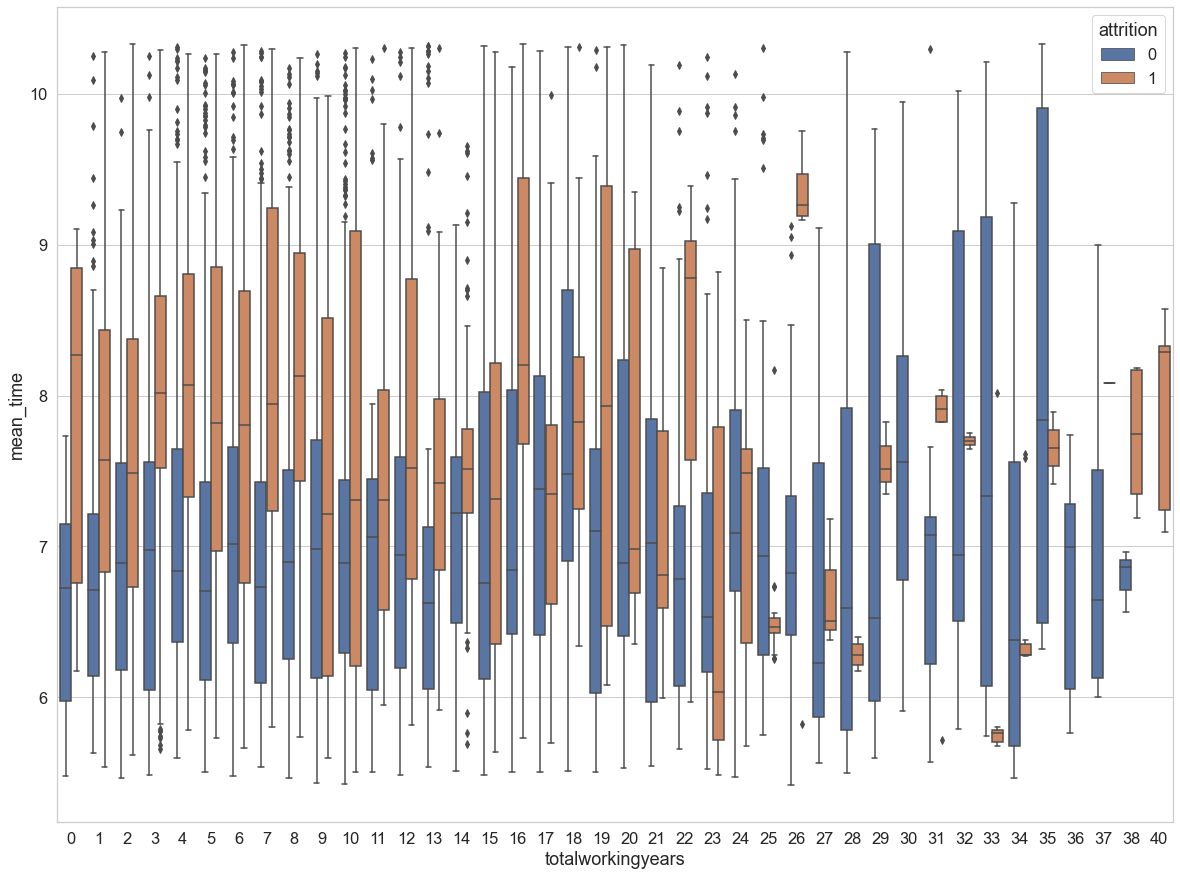

In [227]:
sns.set(rc={'figure.figsize':(20,15)}, font_scale=1.5, style='whitegrid')
plot= sns.boxplot(y='mean_time',x='totalworkingyears', hue = 'attrition', data=hr_feat)b

In [230]:
#plot= sns.boxplot(y='age',x='monthlyincome', hue = 'attrition', data=hr_feat)